# Analýza dat pro mapu povodí

In [14]:
# -*- coding: utf-8 -*-
from __future__ import unicode_literals

In [15]:
# NASTAVENÍ PROMĚNNÝCH:

# idealni pocet poylgonu v povodí
ideal_pocet = 11

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# nacti csv soubory (vystupy funkce 2_povodi.py)
p = pd.read_csv(r"C:\fenclova\diplomka\analyza\vysledky\2_pocet_povodi1991.csv").set_index("ID")

p.head()

,pocet_povodi,pocet_povodi_vse,rozvodnice_delka,dibA02_delka
ID,,,,
46,8,12,39290.0,12953.92
58,17,22,57545.0,19878.12
92,12,15,48840.0,9289.05
96,14,26,48875.0,17267.96
104,5,6,30940.0,8092.19


In [17]:
p.describe()

,pocet_povodi,pocet_povodi_vse,rozvodnice_delka,dibA02_delka
count,1965.000000,1965.000000,1965.000000,1965.000000
mean,12.074300,24.587786,47764.562341,11595.417878
std,4.135507,15.145326,9481.774462,7016.126122
min,2.000000,4.000000,19445.000000,51.370000
25%,9.000000,15.000000,41585.000000,6239.710000
50%,12.000000,21.000000,47565.000000,10873.000000
75%,15.000000,30.000000,54035.000000,16074.600000
max,29.000000,173.000000,81710.000000,46174.620000


Text(0.5,1,u'Rozlo\u017een\xed po\u010dtu povod\xed')

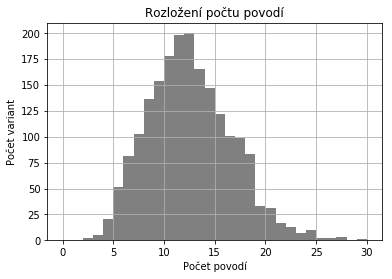

In [22]:
# histogram počtu povodí
d = p.pocet_povodi
plt.figure()

dx = d.hist(bins=30, range=[0, 30], facecolor='grey', align='mid'
           )
dx.set_xlabel('Počet povodí')
dx.set_ylabel('Počet variant')
dx.set_title("Rozložení počtu povodí")

In [18]:
# 1. vyřazení nevhodných variant > nastavení podmínky minimum// maximum
# rozdělení do kategorií podle počtu

In [23]:
# pokus: přípustné varianty, točí se kolem ideální varianty
p[(p.pocet_povodi >= 9) & (p.pocet_povodi >= 15)].describe()

,pocet_povodi,pocet_povodi_vse,rozvodnice_delka,dibA02_delka
count,524.000000,524.000000,524.000000,524.000000
mean,17.416031,36.988550,58822.967557,14637.374847
std,2.420951,16.988801,5948.888019,8249.658471
min,15.000000,16.000000,46970.000000,160.040000
25%,16.000000,26.000000,54662.500000,8351.005000
50%,17.000000,33.000000,58120.000000,13570.150000
75%,18.000000,43.000000,62108.750000,20209.565000
max,29.000000,173.000000,81710.000000,46174.620000


In [24]:
# pokus: přípustné varianty, točí se kolem ideální varianty 
p[(p.pocet_povodi >= ideal_pocet-4) # 11-4= 7 povodí
             & (p.pocet_povodi >= ideal_pocet+4) # 11+4 = 15 povodí
            & (p.pocet_povodi_vse <= 3*p.pocet_povodi)
             # počet povodí před vyřazením všech, které jsou menší než 1 cm2
             # je menší než 3* počet výsledných povodí
            ].describe()

,pocet_povodi,pocet_povodi_vse,rozvodnice_delka,dibA02_delka
count,461.000000,461.000000,461.000000,461.000000
mean,17.414317,32.370933,58589.381779,14430.441952
std,2.401026,9.702932,5606.675068,8127.422355
min,15.000000,16.000000,47430.000000,160.040000
25%,16.000000,25.000000,54620.000000,8179.180000
50%,17.000000,30.000000,58055.000000,13192.440000
75%,18.000000,38.000000,61670.000000,20053.590000
max,27.000000,66.000000,80030.000000,44989.460000
